In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("synnaxdata/train.csv")
test=pd.read_csv("synnaxdata/test.csv")

In [3]:
data.head()

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,...,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end
0,196,Personal Services,Consumer Cyclical,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,...,2.405020e+08,NaN,2.317100e+07,5.431900e+07,4.073200e+07,2150000.0,5946000.0,1.722500e+07,15075000.0,0.0
1,1568,Building Products & Equipment,Industrials,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,...,3.265380e+08,-71929000.0,4.105740e+08,6.926880e+08,1.103262e+09,-39287000.0,333229000.0,7.734500e+07,116632000.0,0.0
2,1218,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.066300e+10,603000000.0,1.649000e+09,4.587000e+09,6.236000e+09,663000000.0,214000000.0,1.435000e+09,772000000.0,0.0
3,23,Scientific & Technical Instruments,Technology,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758000e+03,-9715.0,0.000000e+00,NaN,NaN,-9683.0,9683.0,-9.683000e+03,0.0,0.0
4,783,Drug Manufacturers - Specialty & Generic,Healthcare,36.0,NaN,NaN,NaN,NaN,NaN,1.231544,...,2.592400e+07,-4676000.0,1.205000e+07,0.000000e+00,1.205000e+07,-1594000.0,13644000.0,-1.594000e+06,0.0,0.0


In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Columns: 212 entries, Id to Q10_fiscal_year_end
dtypes: float64(207), int64(1), object(4)
memory usage: 2.6+ MB


In [5]:
targets=[c for c in data.columns if c.startswith("Q0_")]
features=[c for c in data.columns if c not in targets+["Id"]]

In [6]:
print(data[targets].isna().mean().sort_values(ascending=False).head(20))
print(data[features].isna().mean().sort_values(ascending=False).head(20))

Q0_TOTAL_ASSETS                 0.0
Q0_TOTAL_LIABILITIES            0.0
Q0_TOTAL_STOCKHOLDERS_EQUITY    0.0
Q0_GROSS_PROFIT                 0.0
Q0_COST_OF_REVENUES             0.0
Q0_REVENUES                     0.0
Q0_OPERATING_INCOME             0.0
Q0_OPERATING_EXPENSES           0.0
Q0_EBITDA                       0.0
Q0_fiscal_year_end              0.0
dtype: float64
trailingPE                 0.555419
shareHolderRightsRisk      0.303571
boardRisk                  0.303571
compensationRisk           0.303571
auditRisk                  0.303571
overallRisk                0.303571
Q7_NET_INCOME              0.250616
Q10_NET_INCOME             0.196429
targetHighPrice            0.189039
numberOfAnalystOpinions    0.189039
targetMedianPrice          0.189039
targetMeanPrice            0.189039
targetLowPrice             0.189039
Q10_COST_OF_REVENUES       0.186576
Q3_NET_INCOME              0.185345
Q10_REVENUES               0.184113
Q9_NET_INCOME              0.182266
Q7_COST_OF_RE

In [7]:
data[targets].describe().T

,count,mean,std,min,25%,50%,75%,max
Q0_TOTAL_ASSETS,1624.0,4.797691e+09,2.636638e+10,-1.953310e+11,9.808875e+07,631705500.0,2.708209e+09,3.848300e+11
Q0_TOTAL_LIABILITIES,1624.0,3.200071e+09,1.624373e+10,-1.399650e+11,3.658962e+07,291650000.0,1.613343e+09,2.127170e+11
Q0_TOTAL_STOCKHOLDERS_EQUITY,1624.0,1.289882e+09,1.169109e+10,-9.784800e+10,1.765381e+07,247001000.0,1.031333e+09,1.807181e+11
Q0_GROSS_PROFIT,1624.0,4.240823e+08,1.817923e+09,-9.170000e+08,2.289663e+06,37557000.0,2.074888e+08,3.718600e+10
Q0_COST_OF_REVENUES,1624.0,6.584900e+08,3.085667e+09,-1.587300e+10,6.294782e+05,25135986.0,2.579560e+08,5.074900e+10
Q0_REVENUES,1624.0,1.062931e+09,4.041767e+09,-3.850000e+08,6.687640e+06,92668000.0,5.159818e+08,4.904800e+10
Q0_OPERATING_INCOME,1624.0,9.842535e+07,6.310543e+08,-2.654000e+09,-1.113500e+07,-200146.5,4.105925e+07,1.374800e+10
Q0_OPERATING_EXPENSES,1624.0,3.557741e+08,1.553039e+09,-2.403000e+07,1.159175e+07,46144500.0,1.805822e+08,4.111800e+10
Q0_EBITDA,1624.0,6.830815e+07,1.438216e+09,-3.282900e+10,-1.493733e+07,-700000.0,3.605775e+07,3.413800e+10
Q0_fiscal_year_end,1624.0,1.662562e-02,1.279034e-01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00


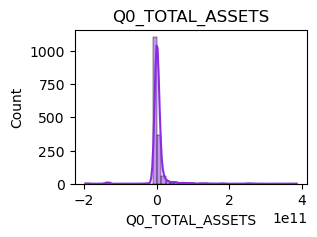

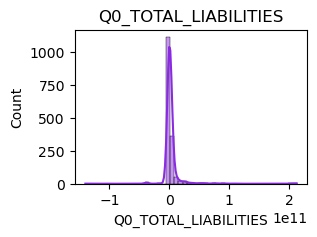

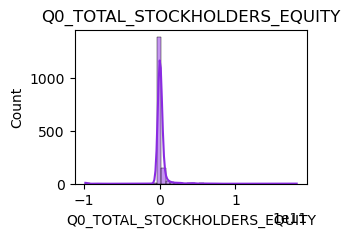

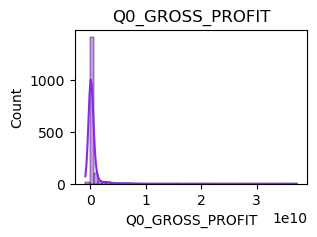

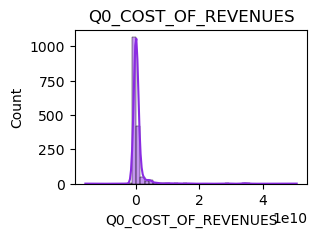

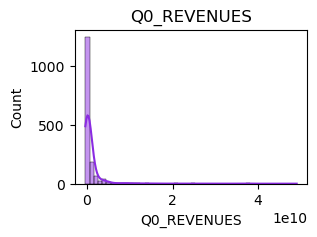

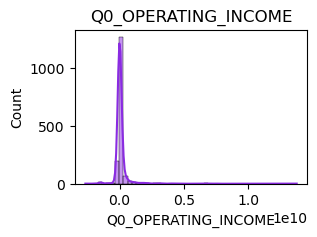

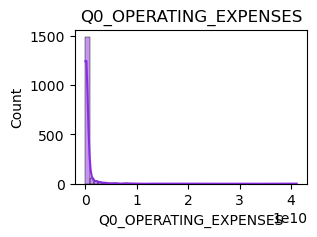

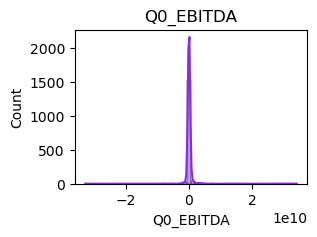

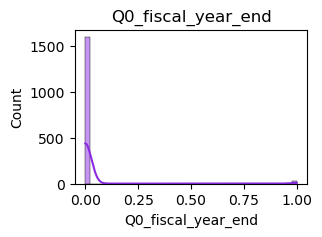

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in targets:
    plt.figure(figsize=(3,2))
    sns.histplot(data[col],bins=50,kde=True,color='blueviolet')
    plt.title(col)
    plt.show()

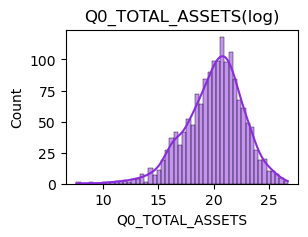

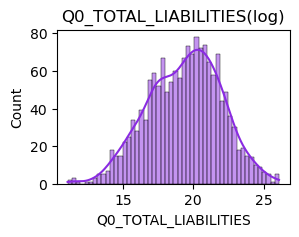

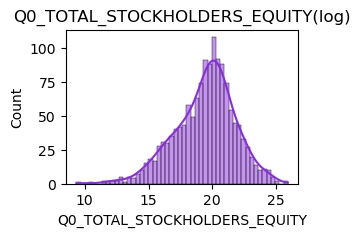

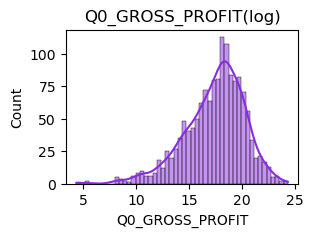

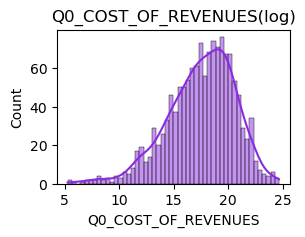

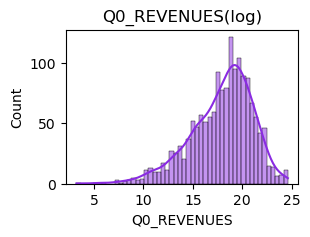

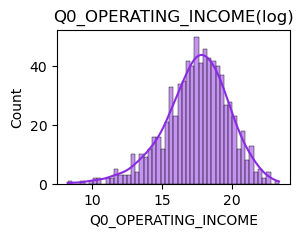

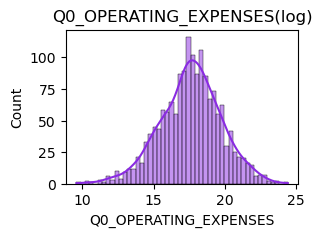

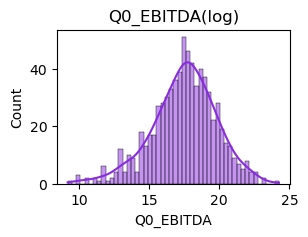

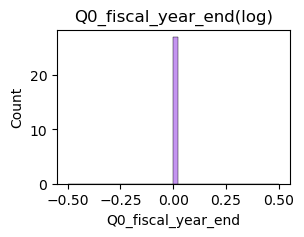

In [9]:
import numpy as np
for col in targets:
    plt.figure(figsize=(3,2))
    values=data[col].dropna()
    values=values[values>0]
    sns.histplot(np.log(values),bins=50,kde=True,color='blueviolet')
    plt.title(col+"(log)")
    plt.show()

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

idcol=data["Id"]
numeric=data.select_dtypes(include=["number"]).columns.difference(targets).difference(idcol)
categorical=data.select_dtypes(include=["object","category"]).columns

numeric_imputer=SimpleImputer(strategy="median",add_indicator=True)
categorical_encoder=OneHotEncoder(handle_unknown="ignore")

In [13]:
includes_inf=np.isinf(data[numeric]).any()
print("Any information values?\n",includes_inf[includes_inf])

max_values=data[numeric].max().sort_values(ascending=False)
print(max_values.head(20))

Any information values?
 forwardPE     True
trailingPE    True
dtype: bool
trailingPE                                   inf
forwardPE                                    inf
Q1_TOTAL_ASSETS                     3.799550e+11
Q1_TOTAL_LIABILITIES_AND_EQUITY     3.799550e+11
Q2_TOTAL_ASSETS                     3.777160e+11
Q2_TOTAL_LIABILITIES_AND_EQUITY     3.777160e+11
Q4_TOTAL_LIABILITIES_AND_EQUITY     3.750900e+11
Q4_TOTAL_ASSETS                     3.750900e+11
Q5_TOTAL_LIABILITIES_AND_EQUITY     3.701470e+11
Q5_TOTAL_ASSETS                     3.701470e+11
Q6_TOTAL_LIABILITIES_AND_EQUITY     3.657160e+11
Q6_TOTAL_ASSETS                     3.657160e+11
Q8_TOTAL_LIABILITIES_AND_EQUITY     3.534570e+11
Q8_TOTAL_ASSETS                     3.534570e+11
Q9_TOTAL_ASSETS                     3.491900e+11
Q9_TOTAL_LIABILITIES_AND_EQUITY     3.491900e+11
Q10_TOTAL_LIABILITIES_AND_EQUITY    3.455730e+11
Q10_TOTAL_ASSETS                    3.455730e+11
Q1_TOTAL_NONCURRENT_ASSETS          3.42567

In [14]:
data[numeric]=data[numeric].replace([np.inf,-np.inf],np.nan)

In [15]:
from sklearn.pipeline import Pipeline

preprocess=ColumnTransformer(
    transformers=[
        ("num",numeric_imputer,numeric),
        ("cat",categorical_encoder,categorical)])

In [16]:
from lightgbm import LGBMRegressor

base_model=LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42)

In [17]:
from sklearn.multioutput import MultiOutputRegressor

multi_model=Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("regressor",MultiOutputRegressor(base_model))])

In [18]:
X_train=data[numeric.tolist()+categorical.tolist()]
y_train=data[targets]

In [21]:
multi_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46080
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 359
[LightGBM] [Info] Start training from score 4797690659.686576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46080
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 359
[LightGBM] [Info] Start training from score 3200071036.821043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46080
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 359
[Light

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median'),
                                                  Index(['Id', 'Q10_COST_OF_REVENUES', 'Q10_DEPRECIATION_AND_AMORTIZATION',
       'Q10_EBITDA', 'Q10_GROSS_PROFIT', 'Q10_NET_INCOME',
       'Q10_OPERATING_EXPENSES', 'Q10_OPERATING_INCOME', 'Q10_REVENUES',
       'Q10_TOTAL_ASSETS',
       ...
       'targetHighPrice', 'targe...
       'targetMedianPrice', 'totalCash', 'totalCashPerShare', 'totalDebt',
       'totalRevenue', 'trailingEps', 'trailingPE'],
      dtype='object', length=198)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['industry', 'sector', 'recommendationKey', 'financialCurrency'], dtype='object'))])),
                ('regressor',
                 MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.05,
                                                              n_estimators=500,
                                                              random_state=42)))])

In [22]:
from sklearn.model_selection import KFold,cross_val_score

kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(
    multi_model,
    X_train,
    y_train,
    cv=kf,
    scoring="r2",
    n_jobs=-1)

print("R2 per fold:",scores)
print("Mean R2:",scores.mean())
print("Std R2:", scores.std())

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

R2 per fold: [0.7088892  0.60177636 0.69440306 0.75644848 0.50994815]
Mean R2: 0.6542930504520346
Std R2: 0.0878848547190894


/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.base import clone
from sklearn.metrics import r2_score

X=X_train
y=y_train

all_r2=[]

for fold,(data,test) in enumerate(kf.split(X),start=1):
    X_tr,X_test=X.iloc[data],X.iloc[test]
    y_tr,y_test=y.iloc[data],y.iloc[test]

    model=clone(multi_model)
    model.fit(X_tr,y_tr)

    y_pred=model.predict(X_test)

    r2=r2_score(y_test,y_pred)
    all_r2.append(r2)

    print(f"Fold {fold}: R2={r2:.4f}")

print("Mean R2:",np.mean(all_r2))
print("Std R2:",np.std(all_r2))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45533
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 338
[LightGBM] [Info] Start training from score 5437490435.303310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45533
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 338
[LightGBM] [Info] Start training from score 3478809890.660797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45533
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 338
[Light

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

Fold 1: R2=0.7089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45597
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 338
[LightGBM] [Info] Start training from score 4346162714.415705
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45597
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 338
[LightGBM] [Info] Start training from score 3041503436.251251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45597
[LightGBM] [Info] Number of data points in the train set: 1299, number of used fe

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

Fold 2: R2=0.6018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45511
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 337
[LightGBM] [Info] Start training from score 4393707147.630485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45511
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 337
[LightGBM] [Info] Start training from score 2930626208.589973
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45511
[LightGBM] [Info] Number of data points in the train set: 1299, number of used fe

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

Fold 3: R2=0.6944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45638
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 333
[LightGBM] [Info] Start training from score 4417491253.354888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45638
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 333
[LightGBM] [Info] Start training from score 2983342253.866821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45638
[LightGBM] [Info] Number of data points in the train set: 1299, number of used fe

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

Fold 4: R2=0.7564
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45616
[LightGBM] [Info] Number of data points in the train set: 1300, number of used features: 333
[LightGBM] [Info] Start training from score 5393143354.583846
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45616
[LightGBM] [Info] Number of data points in the train set: 1300, number of used features: 333
[LightGBM] [Info] Start training from score 3565791854.461058
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45616
[LightGBM] [Info] Number of data points in the train set: 1300, number of used fe

/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/maudq/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

In [27]:
r2_pertarget=r2_score(y_test,y_pred,multioutput="raw_values")
print(dict(zip(targets,r2_pertarget)))

{'Q0_TOTAL_ASSETS': np.float64(0.28736912352058164), 'Q0_TOTAL_LIABILITIES': np.float64(0.2143295887383977), 'Q0_TOTAL_STOCKHOLDERS_EQUITY': np.float64(0.5310996671428709), 'Q0_GROSS_PROFIT': np.float64(0.7764564525494595), 'Q0_COST_OF_REVENUES': np.float64(0.9327014270035384), 'Q0_REVENUES': np.float64(0.9350401664102926), 'Q0_OPERATING_INCOME': np.float64(0.562502217406815), 'Q0_OPERATING_EXPENSES': np.float64(0.48210100625910035), 'Q0_EBITDA': np.float64(-0.10181167096227228), 'Q0_fiscal_year_end': np.float64(0.4796935323911946)}


In [30]:
Q0bad="Q0_TOTAL_ASSETS"
y_badQ0=y_train[Q0bad]
#y_predQ0=scores[:,list(targets).index(Q0bad)]

print(y_badQ0.describe())

count    1.624000e+03
mean     4.797691e+09
std      2.636638e+10
min     -1.953310e+11
25%      9.808875e+07
50%      6.317055e+08
75%      2.708209e+09
max      3.848300e+11
Name: Q0_TOTAL_ASSETS, dtype: float64
